In [ ]:
# SATELLITE IMAGE ANALYSIS FOR BEGINNERS

# 🔧 Step 1: Import Necessary Libraries
import rasterio  # For reading satellite image formats like GeoTIFF
import numpy as np  # For numerical processing
import matplotlib.pyplot as plt  # For plotting graphs
import matplotlib.colors as mcolors  # For custom color maps
from rasterio.plot import plotting_extent  # For getting spatial extents of rasters
from rasterio.warp import calculate_default_transform, reproject, Resampling
import contextily as ctx  # For adding basemaps

# 📂 Step 2: Load Red and NIR Band Images Separately
# Make sure to replace these paths with the correct file paths
red_band_path = "hs15.tiff"
nir_band_path = "hs27.tiff"

# Read Red band
with rasterio.open(red_band_path) as red_src:
    red_band = red_src.read(1).astype(float)
    red_transform = red_src.transform
    red_crs = red_src.crs
    red_extent = plotting_extent(red_src)
    print("Red Band Shape:", red_band.shape)

# Read NIR band
with rasterio.open(nir_band_path) as nir_src:
    nir_band = nir_src.read(1).astype(float)
    print("NIR Band Shape:", nir_band.shape)

# 🧮 Step 3: Compute NDVI (Normalized Difference Vegetation Index)
# NDVI = (NIR - Red) / (NIR + Red)
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)  # avoid division by zero

# 🎨 Step 4: Define a custom colormap for vegetation
# Green for high NDVI (healthy vegetation), brown for low NDVI, beige for neutral
ndvi_cmap = mcolors.LinearSegmentedColormap.from_list("veg_map", [
    (0.0, "saddlebrown"),   # very low
    (0.2, "peru"),
    (0.4, "khaki"),
    (0.6, "yellowgreen"),
    (0.8, "green"),         # high NDVI
    (1.0, "darkgreen")
])

# 🌍 Step 5: Reproject NDVI to EPSG:3857 for mapping
# Calculate transform and dimensions for reprojection
dst_crs = 'EPSG:3857'
transform, width, height = calculate_default_transform(
    red_crs, dst_crs, red_band.shape[1], red_band.shape[0], *red_src.bounds
)

ndvi_projected = np.empty((height, width), dtype=np.float32)
reproject(
    source=ndvi,
    destination=ndvi_projected,
    src_transform=red_transform,
    src_crs=red_crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

# 🗺️ Step 6: Plot NDVI Overlaid on a Transparent Basemap
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.imshow(ndvi_projected, cmap=ndvi_cmap, vmin=-1, vmax=1,
                extent=[transform[2], transform[2] + transform[0] * width,
                        transform[5] + transform[4] * height, transform[5]])
ctx.add_basemap(ax, crs=dst_crs, alpha=0.0)  # transparent basemap
ax.set_title("NDVI with Transparent Basemap Overlay")
ax.set_axis_off()
plt.colorbar(cax, ax=ax, label='NDVI Value')
plt.show()

Red Band Shape: (13833, 4096)
NIR Band Shape: (13833, 4096)


Red Band Shape: (13833, 4096)
NIR Band Shape: (13833, 4096)


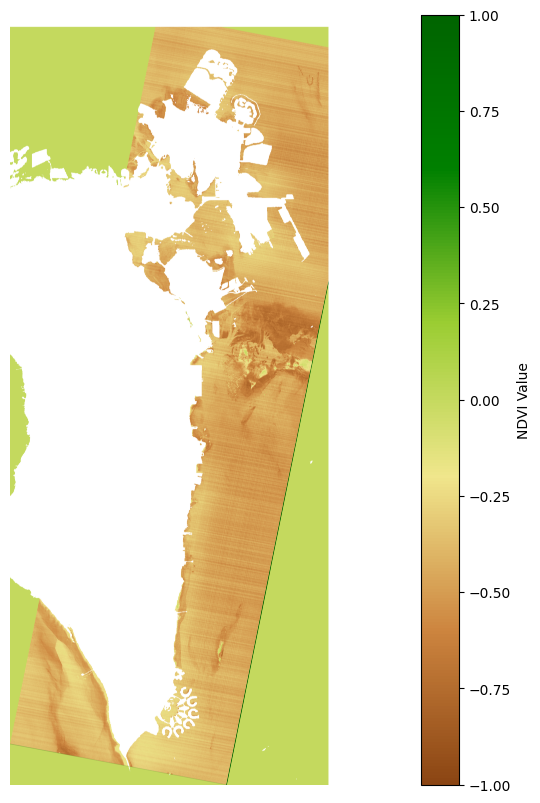

GeoTIFF saved as masked_ndvi_output.tif


In [1]:
# SATELLITE IMAGE ANALYSIS FOR BEGINNERS

# 🔧 Step 1: Import Necessary Libraries
import rasterio  # For reading satellite image formats like GeoTIFF
import numpy as np  # For numerical processing
import matplotlib.pyplot as plt  # For plotting graphs
import matplotlib.colors as mcolors  # For custom color maps
from rasterio.plot import plotting_extent  # For getting spatial extents of rasters
from rasterio.warp import calculate_default_transform, reproject, Resampling
import contextily as ctx  # For adding basemaps

# 📂 Step 2: Load Red and NIR Band Images Separately
# Make sure to replace these paths with the correct file paths
red_band_path = "hs15.tiff"
nir_band_path = "hs27.tiff"

# Read Red band
with rasterio.open(red_band_path) as red_src:
    red_band = red_src.read(1).astype(float)
    red_transform = red_src.transform
    red_crs = red_src.crs
    red_extent = plotting_extent(red_src)
    print("Red Band Shape:", red_band.shape)

# Read NIR band
with rasterio.open(nir_band_path) as nir_src:
    nir_band = nir_src.read(1).astype(float)
    print("NIR Band Shape:", nir_band.shape)

# 🧾 Step 3: Compute NDVI (Normalized Difference Vegetation Index)
# NDVI = (NIR - Red) / (NIR + Red)
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)  # avoid division by zero

# 🎨 Step 4: Define a custom colormap for vegetation
# Green for high NDVI (healthy vegetation), brown for low NDVI, beige for neutral
ndvi_cmap = mcolors.LinearSegmentedColormap.from_list("veg_map", [
    (0.0, "saddlebrown"),   # very low
    (0.2, "peru"),
    (0.4, "khaki"),
    (0.6, "yellowgreen"),
    (0.8, "green"),         # high NDVI
    (1.0, "darkgreen")
])
ndvi_cmap.set_bad(color='white')  # Set NaNs to appear white

# 🌍 Step 5: Reproject NDVI to EPSG:3857 for mapping
# Calculate transform and dimensions for reprojection
dst_crs = 'EPSG:3857'
transform, width, height = calculate_default_transform(
    red_crs, dst_crs, red_band.shape[1], red_band.shape[0], *red_src.bounds
)

ndvi_projected = np.empty((height, width), dtype=np.float32)
reproject(
    source=ndvi,
    destination=ndvi_projected,
    src_transform=red_transform,
    src_crs=red_crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

# ➕ Step 6: Apply Mask Based on Third TIFF Image
mask_path = "water_small.tif"  # Replace with the actual mask image path
with rasterio.open(mask_path) as mask_src:
    mask_data = mask_src.read(1).astype(float)
    mask_transform = mask_src.transform
    mask_crs = mask_src.crs

# Reproject mask to match NDVI projection
mask_reprojected = np.empty((height, width), dtype=np.float32)
reproject(
    source=mask_data,
    destination=mask_reprojected,
    src_transform=mask_transform,
    src_crs=mask_crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

# Apply white mask where pixel values are less than 97
masked_ndvi = ndvi_projected.copy()
masked_ndvi[mask_reprojected < 97] = np.nan  # use NaN for white transparency

# 🗈️ Step 7: Plot and Save Masked NDVI Overlaid on a White Background
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('white')  # Make the figure background white
ax.set_facecolor("white")  # set axes background explicitly white
cax = ax.imshow(masked_ndvi, cmap=ndvi_cmap, vmin=-1, vmax=1,
                extent=[transform[2], transform[2] + transform[0] * width,
                        transform[5] + transform[4] * height, transform[5]])
ax.set_axis_off()
plt.colorbar(cax, ax=ax, label='NDVI Value')
plt.savefig("masked_ndvi_output.jpg", format='jpg', dpi=300)
plt.show()

# 🗃️ Step 8: Save Masked NDVI as GeoTIFF
output_tiff_path = "masked_ndvi_output.tif"

# Replace NaNs with a nodata value (e.g., -9999)
masked_ndvi_out = np.nan_to_num(masked_ndvi, nan=-9999)

with rasterio.open(
    output_tiff_path,
    "w",
    driver="GTiff",
    height=masked_ndvi_out.shape[0],
    width=masked_ndvi_out.shape[1],
    count=1,
    dtype=masked_ndvi_out.dtype,
    crs=dst_crs,
    transform=transform,
    nodata=-9999
) as dst:
    dst.write(masked_ndvi_out, 1)

print(f"GeoTIFF saved as {output_tiff_path}")

Red Band Shape: (13833, 4096)
NIR Band Shape: (13833, 4096)
Raw NDVI GeoTIFF saved as ndvi_raw_output.tif


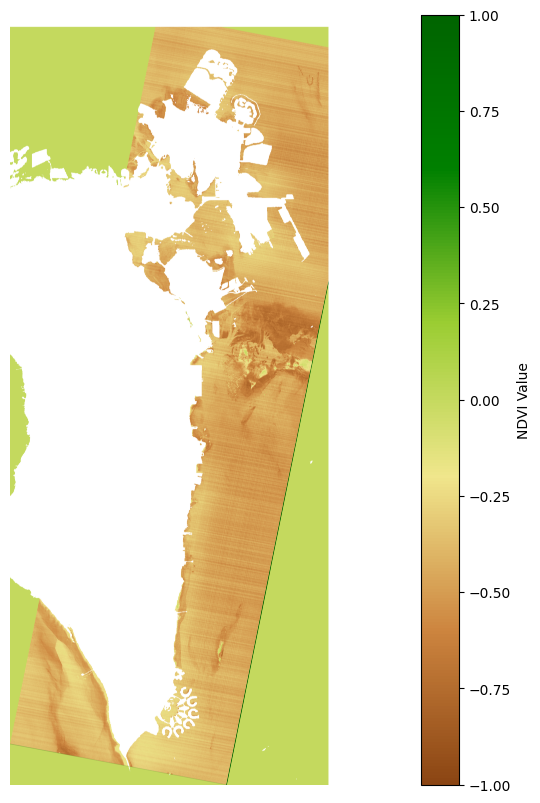

Masked NDVI GeoTIFF saved as masked_ndvi_output.tif


In [2]:
# SATELLITE IMAGE ANALYSIS FOR BEGINNERS

# 🔧 Step 1: Import Necessary Libraries
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from rasterio.plot import plotting_extent
from rasterio.warp import calculate_default_transform, reproject, Resampling
import contextily as ctx

# 📂 Step 2: Load Red and NIR Band Images Separately
red_band_path = "hs15.tiff"
nir_band_path = "hs27.tiff"

with rasterio.open(red_band_path) as red_src:
    red_band = red_src.read(1).astype(float)
    red_transform = red_src.transform
    red_crs = red_src.crs
    red_extent = plotting_extent(red_src)
    print("Red Band Shape:", red_band.shape)

with rasterio.open(nir_band_path) as nir_src:
    nir_band = nir_src.read(1).astype(float)
    print("NIR Band Shape:", nir_band.shape)

# 🧾 Step 3: Compute NDVI (Normalized Difference Vegetation Index)
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)

# 🗃️ Save Raw NDVI as GeoTIFF Immediately (EARLY OUTPUT)
raw_ndvi_tiff_path = "ndvi_raw_output.tif"
ndvi_clean = np.nan_to_num(ndvi, nan=-9999)

with rasterio.open(
    raw_ndvi_tiff_path,
    "w",
    driver="GTiff",
    height=ndvi_clean.shape[0],
    width=ndvi_clean.shape[1],
    count=1,
    dtype=ndvi_clean.dtype,
    crs=red_crs,
    transform=red_transform,
    nodata=-9999
) as dst:
    dst.write(ndvi_clean, 1)

print(f"Raw NDVI GeoTIFF saved as {raw_ndvi_tiff_path}")

# 🎨 Step 4: Define NDVI colormap
ndvi_cmap = mcolors.LinearSegmentedColormap.from_list("veg_map", [
    (0.0, "saddlebrown"),
    (0.2, "peru"),
    (0.4, "khaki"),
    (0.6, "yellowgreen"),
    (0.8, "green"),
    (1.0, "darkgreen")
])
ndvi_cmap.set_bad(color='white')

# 🌍 Step 5: Reproject NDVI to EPSG:3857
dst_crs = 'EPSG:3857'
transform, width, height = calculate_default_transform(
    red_crs, dst_crs, red_band.shape[1], red_band.shape[0], *red_src.bounds
)

ndvi_projected = np.empty((height, width), dtype=np.float32)
reproject(
    source=ndvi,
    destination=ndvi_projected,
    src_transform=red_transform,
    src_crs=red_crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

# ➕ Step 6: Apply Mask Based on Third TIFF Image
mask_path = "water_small.tif"
with rasterio.open(mask_path) as mask_src:
    mask_data = mask_src.read(1).astype(float)
    mask_transform = mask_src.transform
    mask_crs = mask_src.crs

mask_reprojected = np.empty((height, width), dtype=np.float32)
reproject(
    source=mask_data,
    destination=mask_reprojected,
    src_transform=mask_transform,
    src_crs=mask_crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

masked_ndvi = ndvi_projected.copy()
masked_ndvi[mask_reprojected < 97] = np.nan

# 🗈️ Step 7: Plot and Save Masked NDVI Image
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('white')
ax.set_facecolor("white")
cax = ax.imshow(masked_ndvi, cmap=ndvi_cmap, vmin=-1, vmax=1,
                extent=[transform[2], transform[2] + transform[0] * width,
                        transform[5] + transform[4] * height, transform[5]])
ax.set_axis_off()
plt.colorbar(cax, ax=ax, label='NDVI Value')
plt.savefig("masked_ndvi_output.jpg", format='jpg', dpi=300)
plt.show()

# 🗃️ Step 8: Save Final Masked NDVI as GeoTIFF
output_tiff_path = "masked_ndvi_output.tif"
masked_ndvi_out = np.nan_to_num(masked_ndvi, nan=-9999)

with rasterio.open(
    output_tiff_path,
    "w",
    driver="GTiff",
    height=masked_ndvi_out.shape[0],
    width=masked_ndvi_out.shape[1],
    count=1,
    dtype=masked_ndvi_out.dtype,
    crs=dst_crs,
    transform=transform,
    nodata=-9999
) as dst:
    dst.write(masked_ndvi_out, 1)

print(f"Masked NDVI GeoTIFF saved as {output_tiff_path}")


In [3]:
# SATELLITE IMAGE ANALYSIS FOR BEGINNERS

# 🔧 Step 1: Import Necessary Libraries
import rasterio  # For reading satellite image formats like GeoTIFF
import numpy as np  # For numerical processing
import matplotlib.pyplot as plt  # For plotting graphs
import matplotlib.colors as mcolors  # For custom color maps
from rasterio.plot import plotting_extent  # For getting spatial extents of rasters
from rasterio.warp import calculate_default_transform, reproject, Resampling
import contextily as ctx  # For adding basemaps
from PIL import Image  # For saving high-quality JPGs

# 📂 Step 2: Load Red and NIR Band Images Separately
red_band_path = "hs15.tiff"
nir_band_path = "hs27.tiff"

# Read Red band
with rasterio.open(red_band_path) as red_src:
    red_band = red_src.read(1).astype(float)
    red_transform = red_src.transform
    red_crs = red_src.crs
    red_extent = plotting_extent(red_src)
    print("Red Band Shape:", red_band.shape)

# Read NIR band
with rasterio.open(nir_band_path) as nir_src:
    nir_band = nir_src.read(1).astype(float)
    print("NIR Band Shape:", nir_band.shape)

# 🗾 Step 3: Compute NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)

# 🎨 Step 4: Define a custom colormap for vegetation
ndvi_cmap = mcolors.LinearSegmentedColormap.from_list("veg_map", [
    (0.0, "saddlebrown"),
    (0.2, "peru"),
    (0.4, "khaki"),
    (0.6, "yellowgreen"),
    (0.8, "green"),
    (1.0, "darkgreen")
])
ndvi_cmap.set_bad(color='white')

# 🌍 Step 5: Reproject NDVI to EPSG:3857
dst_crs = 'EPSG:3857'
transform, width, height = calculate_default_transform(
    red_crs, dst_crs, red_band.shape[1], red_band.shape[0], *red_src.bounds
)

ndvi_projected = np.empty((height, width), dtype=np.float32)
reproject(
    source=ndvi,
    destination=ndvi_projected,
    src_transform=red_transform,
    src_crs=red_crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

# ➕ Step 6: Apply Mask
mask_path = "water_small.tif"
with rasterio.open(mask_path) as mask_src:
    mask_data = mask_src.read(1).astype(float)
    mask_transform = mask_src.transform
    mask_crs = mask_src.crs

mask_reprojected = np.empty((height, width), dtype=np.float32)
reproject(
    source=mask_data,
    destination=mask_reprojected,
    src_transform=mask_transform,
    src_crs=mask_crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

masked_ndvi = ndvi_projected.copy()
masked_ndvi[mask_reprojected < 97] = np.nan

# 🗈️ Step 7: Save High-Quality NDVI JPG
fig, ax = plt.subplots(figsize=(20, 16), dpi=300)
fig.patch.set_facecolor('white')
ax.set_facecolor("white")
cax = ax.imshow(masked_ndvi, cmap=ndvi_cmap, vmin=-1, vmax=1,
                extent=[transform[2], transform[2] + transform[0] * width,
                        transform[5] + transform[4] * height, transform[5]])
ax.set_axis_off()
cbar = plt.colorbar(cax, ax=ax, label='NDVI Value', shrink=0.7, pad=0.02)
cbar.ax.tick_params(labelsize=10)

temp_path = "temp_masked_ndvi_output.png"
plt.savefig(temp_path, dpi=600, bbox_inches='tight', pad_inches=0, format='png')
plt.close()

with Image.open(temp_path) as im:
    rgb_im = im.convert('RGB')
    rgb_im.save("masked_ndvi_output_highres.jpg", format='JPEG', quality=100, subsampling=0)

print("High-quality masked NDVI saved as 'masked_ndvi_output_highres.jpg'")

# 🗃️ Step 8: Save GeoTIFF
output_tiff_path = "masked_ndvi_output.tif"
masked_ndvi_out = np.nan_to_num(masked_ndvi, nan=-9999)

with rasterio.open(
    output_tiff_path,
    "w",
    driver="GTiff",
    height=masked_ndvi_out.shape[0],
    width=masked_ndvi_out.shape[1],
    count=1,
    dtype=masked_ndvi_out.dtype,
    crs=dst_crs,
    transform=transform,
    nodata=-9999
) as dst:
    dst.write(masked_ndvi_out, 1)

print(f"GeoTIFF saved as {output_tiff_path}")


Red Band Shape: (13833, 4096)
NIR Band Shape: (13833, 4096)
High-quality masked NDVI saved as 'masked_ndvi_output_highres.jpg'
GeoTIFF saved as masked_ndvi_output.tif


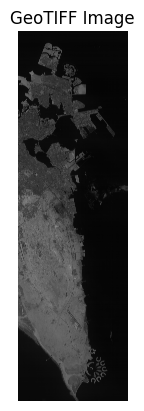

In [10]:
import rasterio
import matplotlib.pyplot as plt

# Path to your GeoTIFF file
geotiff_path = "hs27.tiff"

# Read the GeoTIFF file
with rasterio.open(geotiff_path) as src:
    image = src.read()  # Reads all bands

# Display the image
# If the image has 3 bands (like RGB), transpose it for matplotlib
if image.shape[0] == 3:
    plt.imshow(image.transpose(1, 2, 0))
else:
    # For single band, display the first band
    plt.imshow(image[0], cmap='gray')

plt.title("GeoTIFF Image")
plt.axis('off')
plt.show()
